<a href="https://colab.research.google.com/github/Jerome-de/crop-production-in-Karnataka/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING NECESSARY LIBRARIES



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

LOAD DATA

In [2]:
data = pd.read_csv("/content/drive/MyDrive/data_season")

 **The dataset records details of crop production in Karnataka, with a focus on Mangalore, over several years and seasons. It combines information about weather, soil, and farm practices with data on yields and market prices.**

 which includes:

 Year: The year the crop was cultivated.

 Location: Geographic area where the crop was grown — mainly "Mangalore".

 Area: Size of land cultivated (in hectares).

 Rainfall: 	Total rainfall during the crop growing period (in mm).

 Temperature: Average temperature over the growing season (°C).

 Soil type: Type of soil (e.g., clay, loam, sandy, alluvial, etc.).

 Irrigation: 	Indicates whether irrigation was used (e.g., "Yes", "No", "Drip", "Canal").

 Yield: Total crop yield per hectare (in tonnes/hectare).

 Humidity: Average humidity level (%) during the growing season.

 Crops: Type of crop grown (e.g., rice, maize, coconut, pulses).

 Price: Market price of the crop (in rupees per tonne).

 Season: Agricultural season: Kharif, Rabi, or Zaid.

In [3]:
data

,Year,Location,Area,Rainfall,Temperature,Soil type,Irrigation,yeilds,Humidity,Crops,price,Season
0,2004,Mangalore,1279,2903.1,27.0,Alluvial,Drip,2570.0,57.0,Coconut,200000,Kharif
1,2004,Mangalore,13283,2903.1,27.0,Alluvial,Drip,27170.0,57.5,Coconut,4847,Kharif
2,2004,Mangalore,52119,2903.1,27.0,Alluvial,Drip,114744.0,57.0,Coconut,51239,Kharif
3,2004,Mangalore,725,2996.6,27.0,Alluvial,Drip,1402.0,55.0,Coconut,216396,Kharif
4,2004,Mangalore,12885,2996.6,27.0,Alluvial,Drip,23456.0,56.0,Coconut,2644,Kharif
...,...,...,...,...,...,...,...,...,...,...,...,...
3153,2013,Davangere,46990,3296.0,27.0,NaN,Drip,107809.0,53.5,Coconut,51239,Rabi
3154,2014,Davangere,103,3296.0,27.0,NaN,Drip,1132.0,52.5,Coconut,216396,Rabi
3155,2015,Davangere,8239,3550.0,27.0,NaN,Drip,23960.0,56.0,Coconut,2644,Rabi
3156,2016,Davangere,44563,3550.0,27.0,NaN,Drip,126487.0,57.0,Coconut,44235,Rabi


**check for duplicates**

In [4]:
data['Crops'].value_counts()

,count
Crops,
Coconut,1458
Ginger,281
Coffee,150
Arecanut,150
Cardamum,150
Blackgram,150
Paddy,150
Tea,150
Pepper,146


In [5]:
data.duplicated().sum()

np.int64(0)

**check for null values**

In [6]:
data.isna().sum()

,0
Year,0
Location,0
Area,0
Rainfall,0
Temperature,0
Soil type,58
Irrigation,0
yeilds,0
Humidity,0
Crops,0


**fill null values in "soil type" with mode**

In [7]:
data['Soil type'] = data['Soil type'].fillna(data['Soil type'].mode()[0])

# **EXPLORATORY DATA ANALYSIS**

**CROP DISTRIBUTION**

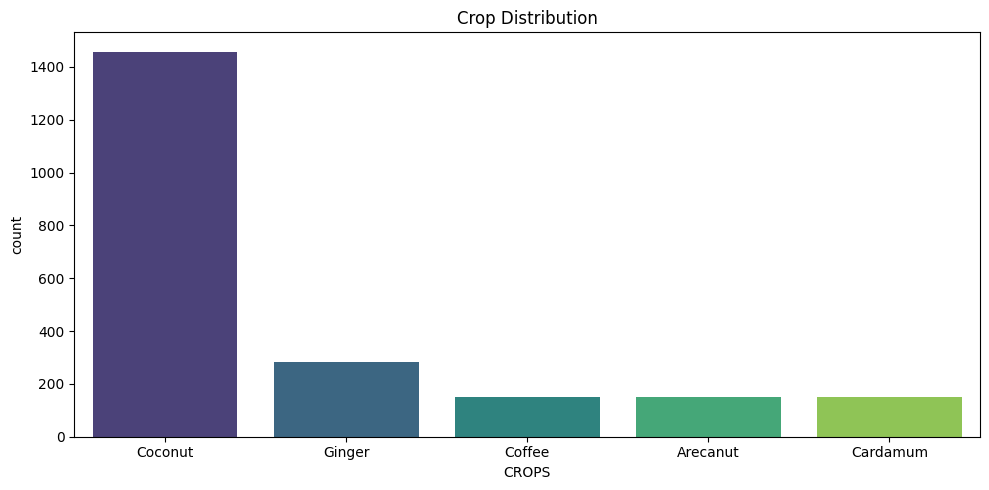

In [8]:
fig, ax = plt.subplots(figsize=(10, 5))
crop_counts = data["Crops"].value_counts().head(5)

sns.barplot(x=crop_counts.index, y=crop_counts.values, palette="viridis", legend= False)
plt.title("Crop Distribution")
plt.xlabel("CROPS")
plt.ylabel("count")
plt.tight_layout()

# **CROP DISTRIBUTION**

*  Coconut is by far the most frequently grown crop, followed by ginger, coffee crops,Arecanut and cardamum.
*   Cash crops dominate this dataset over short-season vegetables or grains.



**AVERAGE YIELD PER YEAR**

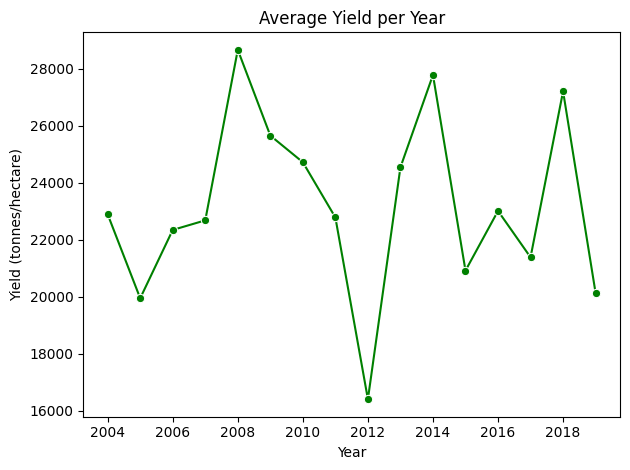

In [9]:
avg_yield_by_year = data.groupby("Year")["yeilds"].mean()
sns.lineplot(x=avg_yield_by_year.index, y=avg_yield_by_year.values, marker="o", color="green")
plt.title("Average Yield per Year")
plt.ylabel("Yield (tonnes/hectare)")
plt.xlabel("Year")
plt.tight_layout()
plt.show()


# **AVERAGE YIELD PER YEAR**


*   there is a drastic decrease in yeild from 2008 to 2012
*   2008 has the highest yield while 2012 has the the lowest yield




# AVERAGE CROP PRICE PER YEAR

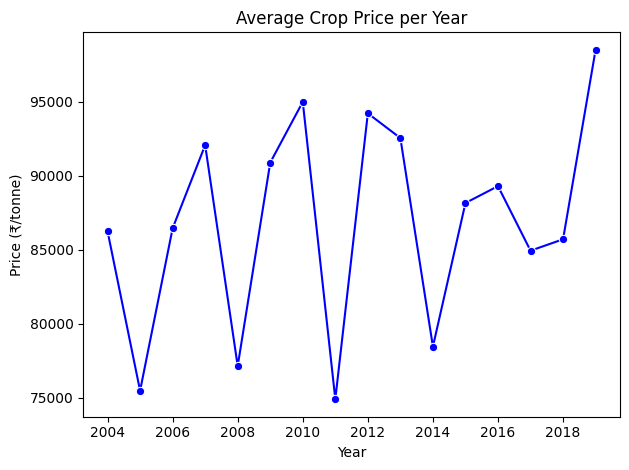

In [10]:
avg_price_by_year = data.groupby("Year")["price"].mean()
sns.lineplot(x=avg_price_by_year.index, y=avg_price_by_year.values, marker="o", color="blue")
plt.title("Average Crop Price per Year")
plt.ylabel("Price (₹/tonne)")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

2019 has the highest price increase

### AVERAGE YIELD BY CROP

In [11]:
avg_yield_by_crop = data.groupby("Crops")["yeilds"].mean().sort_values(ascending=False).head(5)
avg_price_by_crop = data.groupby("Crops")["price"].mean().sort_values(ascending=False).head(5)

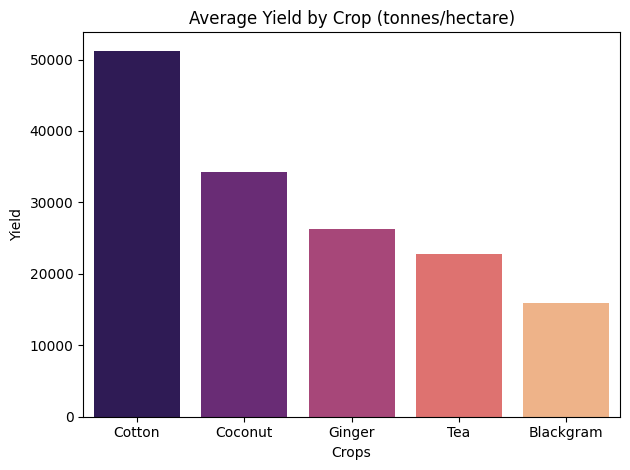

In [12]:
sns.barplot(x=avg_yield_by_crop.index, y=avg_yield_by_crop.values, palette="magma")
plt.title("Average Yield by Crop (tonnes/hectare)")
plt.ylabel("Yield")
plt.tight_layout()
plt.show()



*  **COTTON and COCONUT show the highest average yields (tonnes/hectare), meaning they are highly productive per hectare.**


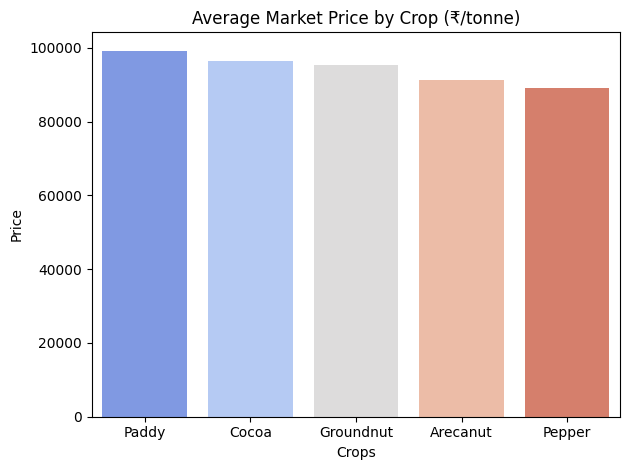

In [13]:
sns.barplot(x=avg_price_by_crop.index, y=avg_price_by_crop.values, palette="coolwarm")
plt.title("Average Market Price by Crop (₹/tonne)")
plt.ylabel("Price")
plt.tight_layout()
plt.show()

paddy, cocoa, and groundnut crops top the price chart indicating high market value despite lower yield.

# **CORRELATION MATRIX**

In [14]:
correlation_matrix = data.select_dtypes(include=["float64", "int64"]).corr()

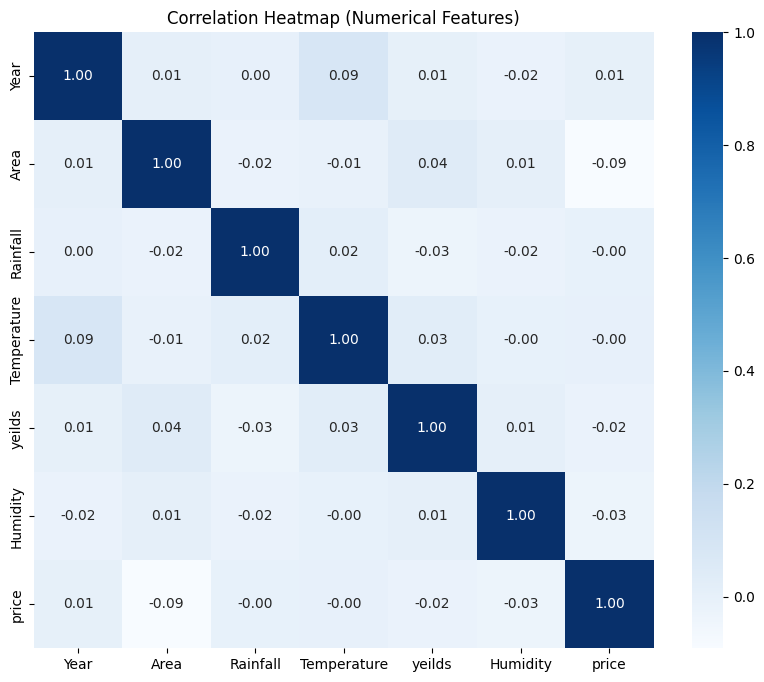

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

**Year & Temperature: Slight increase in temperature over the years — maybe a small climate trend.**

**Yield & Area: Very weak positive correlation — larger farms may yield slightly more.**

**Yield & Rainfall: Almost no correlation — suggests rainfall isn’t a major determinant alone.**

**Price & Any Feature: Price is largely independent of weather or yield — likely market-driven.**

**Humidity & Yield: Essentially no relationship**

**Temperature & Rainfall: No relationship — they vary independently in this dataset.**

# **LOGISTIC REGRESSION**

ENCODING CATEGORICAL DATAS

In [16]:
real_data = data.copy()

In [17]:
real_data

,Year,Location,Area,Rainfall,Temperature,Soil type,Irrigation,yeilds,Humidity,Crops,price,Season
0,2004,Mangalore,1279,2903.1,27.0,Alluvial,Drip,2570.0,57.0,Coconut,200000,Kharif
1,2004,Mangalore,13283,2903.1,27.0,Alluvial,Drip,27170.0,57.5,Coconut,4847,Kharif
2,2004,Mangalore,52119,2903.1,27.0,Alluvial,Drip,114744.0,57.0,Coconut,51239,Kharif
3,2004,Mangalore,725,2996.6,27.0,Alluvial,Drip,1402.0,55.0,Coconut,216396,Kharif
4,2004,Mangalore,12885,2996.6,27.0,Alluvial,Drip,23456.0,56.0,Coconut,2644,Kharif
...,...,...,...,...,...,...,...,...,...,...,...,...
3153,2013,Davangere,46990,3296.0,27.0,Alluvial,Drip,107809.0,53.5,Coconut,51239,Rabi
3154,2014,Davangere,103,3296.0,27.0,Alluvial,Drip,1132.0,52.5,Coconut,216396,Rabi
3155,2015,Davangere,8239,3550.0,27.0,Alluvial,Drip,23960.0,56.0,Coconut,2644,Rabi
3156,2016,Davangere,44563,3550.0,27.0,Alluvial,Drip,126487.0,57.0,Coconut,44235,Rabi


In [18]:
categorical_cols = ['Location','Soil type', 'Irrigation', 'Crops']
numeric_cols = ['Rainfall', 'Temperature', 'yeilds', 'Humidity']
target_col = 'Season'

In [19]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib
# Location
le_location = LabelEncoder()
data['Location'] = le_location.fit_transform(data['Location'])
joblib.dump(le_location, '/content/drive/MyDrive/Location_encoder.pkl')

# soil_type
le_soil = LabelEncoder()
data['Soil type'] = le_soil.fit_transform(data['Soil type'])
joblib.dump(le_soil, '/content/drive/MyDrive/Soil type_encoder.pkl')

# Irrigation
le_irrigation = LabelEncoder()
data['Irrigation'] = le_irrigation.fit_transform(data['Irrigation'])
joblib.dump(le_irrigation, '/content/drive/MyDrive/Irrigation_encoder.pkl')

# Crops
le_crops = LabelEncoder()
data['Crops'] = le_crops.fit_transform(data['Crops'])
joblib.dump(le_crops, '/content/drive/MyDrive/Crops_encoder.pkl')

['/content/drive/MyDrive/Crops_encoder.pkl']

**ASSIGNING X AND Y VARIABLES**

In [20]:
# Encode target column (Season)
le_target = LabelEncoder()
data[target_col] = le_target.fit_transform(data[target_col])
joblib.dump(le_target, '/content/drive/MyDrive/target_encoder.pkl')

scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])
joblib.dump(scaler, '/content/drive/MyDrive/numeric_scaler.pkl')

['/content/drive/MyDrive/numeric_scaler.pkl']

In [21]:
X = data[categorical_cols + numeric_cols]
y = data[target_col]

**SPLITTING INTO TESTING AND TRAINING SET**

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.2, random_state=42, stratify= y)

In [23]:
X

,Location,Soil type,Irrigation,Crops,Rainfall,Temperature,yeilds,Humidity
0,8,0,1,5,0.077320,-0.639653,-0.355360,0.574099
1,8,0,1,5,0.077320,-0.639653,0.067177,0.776579
2,8,0,1,5,0.077320,-0.639653,1.571374,0.574099
3,8,0,1,5,0.157671,-0.639653,-0.375422,-0.235820
4,8,0,1,5,0.157671,-0.639653,0.003384,0.169139
...,...,...,...,...,...,...,...,...
3153,2,0,1,5,0.414966,-0.639653,1.452256,-0.843260
3154,2,0,1,5,0.414966,-0.639653,-0.380060,-1.248220
3155,2,0,1,5,0.633245,-0.639653,0.012041,0.169139
3156,2,0,1,5,0.633245,-0.639653,1.773075,0.574099


# **MODEL TRAINING(LOGISTIC REGRESSION)**

In [24]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state= 42)
model.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [25]:
from sklearn.metrics import  classification_report,confusion_matrix
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       121
           1       0.57      0.99      0.72       349
           2       0.89      0.10      0.18       162

    accuracy                           0.57       632
   macro avg       0.48      0.36      0.30       632
weighted avg       0.54      0.57      0.44       632



In [26]:
y.value_counts()

,count
Season,
1,1742
2,809
0,607


<Axes: ylabel='count'>

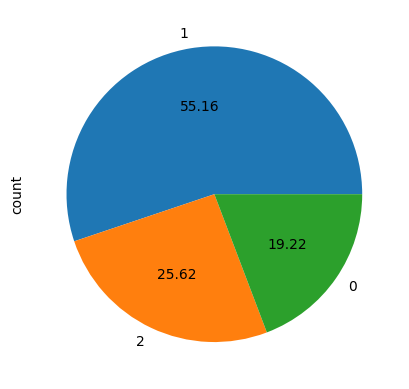

In [27]:
y.value_counts().plot.pie(autopct = '%.2f')

**OVER SAMPLING**

In [28]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy= {2:1052,0:1052}, random_state= 42)
X_res,y_res = ros.fit_resample(X,y)

In [29]:
y_res.value_counts()

,count
Season,
1,1742
0,1052
2,1052


**UNDER SAMPLING**

In [30]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy= {1:1052}, random_state= 42)
X_resample,y_resample = rus.fit_resample(X_res,y_res)

In [31]:
y_resample.value_counts()

,count
Season,
0,1052
1,1052
2,1052


<Axes: ylabel='count'>

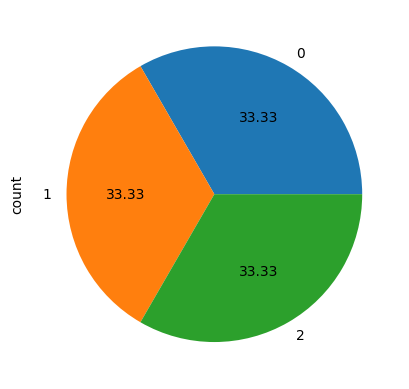

In [32]:
y_resample.value_counts().plot.pie(autopct = '%.2f')

In [33]:
from sklearn.linear_model import LogisticRegression
Lmodel = LogisticRegression(solver= 'lbfgs',penalty ='l2', random_state= 42)
Lmodel.fit(X_resample,y_resample)

LogisticRegression(random_state=42)

In [34]:
from sklearn.metrics import  classification_report,confusion_matrix
Lpred = Lmodel.predict(X_test)
print(classification_report(y_test,Lpred))

              precision    recall  f1-score   support

           0       0.26      0.40      0.31       121
           1       0.60      0.38      0.46       349
           2       0.33      0.45      0.38       162

    accuracy                           0.40       632
   macro avg       0.39      0.41      0.39       632
weighted avg       0.46      0.40      0.41       632



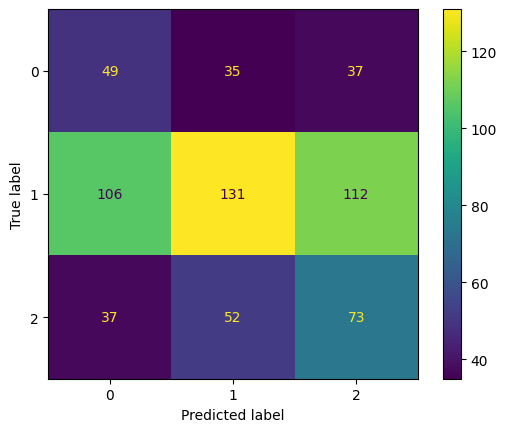

In [35]:
import sklearn.metrics as metrics
LCM = metrics.confusion_matrix(y_test,Lpred,labels = Lmodel.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = LCM,display_labels = model.classes_)
disp.plot()

 **Class 0:**


*   49 correctly predicted as 0
*   Misclassified as 1: 35 times
*   Misclassified as 2: 37 times


 **Class 1:**


*   131 correctly predicted as 1 which is the Highest correct count
*   Misclassified as 0: 106 times
*   Misclassified as 2: 112 times

 **Class 2:**


*   73 correctly predicted as 2
*   Misclassified as 0: 37 times
*   MMisclassified as 1: 52 times




# **XGB CLASSIFIER**

In [36]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(random_state= 42)
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [37]:
Xpred = xgb_model.predict(X_test)
print(classification_report(y_test,Xpred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       121
           1       0.99      0.98      0.99       349
           2       0.97      0.99      0.98       162

    accuracy                           0.98       632
   macro avg       0.97      0.98      0.98       632
weighted avg       0.98      0.98      0.98       632



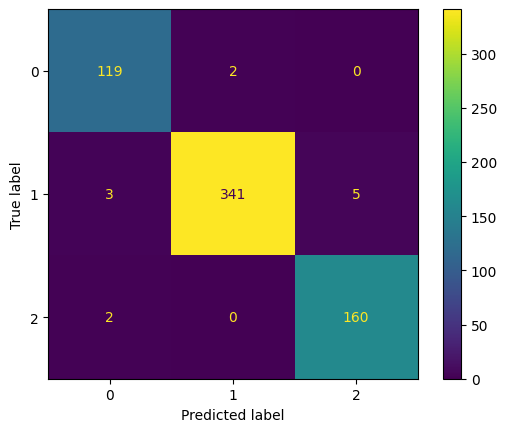

In [38]:
XGBCM = metrics.confusion_matrix(y_test,Xpred,labels = xgb_model.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = XGBCM,display_labels = xgb_model.classes_)
disp.plot()

* Class 0 is predicted with very high accuracy. Out of 121 actual class 0 samples, 119 were correctly predicted as class 0, with only 2 misclassified as class 1. There were no misclassifications into class 2, indicating the model can clearly distinguish class 0 from the others.

* Class 1 has the highest number of samples and is also the best predicted. Out of 349 actual class 1 samples, 341 were correctly classified. Only 3 were mistakenly predicted as class 0 and 5 as class 2. This shows that the model is highly confident and precise in recognizing class 1, with minimal confusion with other classes.

* Class 2 is also very well predicted. Out of 162 actual instances, 160 were correctly identified, and only 2 were misclassified as class 0. There were no class 2 samples misclassified as class 1, showing that the model understands the boundaries for class 2 quite well.

Overall, the matrix shows that the model performs accurately across all classes, with very few errors and little overlap between the predicted and actual labels.

# **DECISION TREE CLASSIFIER**

In [39]:
from sklearn.tree import DecisionTreeClassifier
DModel = DecisionTreeClassifier(random_state=42)
DModel.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [40]:
Dpred = DModel.predict(X_test)
print(classification_report(y_test,Dpred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       121
           1       0.97      0.95      0.96       349
           2       0.92      0.96      0.94       162

    accuracy                           0.96       632
   macro avg       0.95      0.96      0.96       632
weighted avg       0.96      0.96      0.96       632



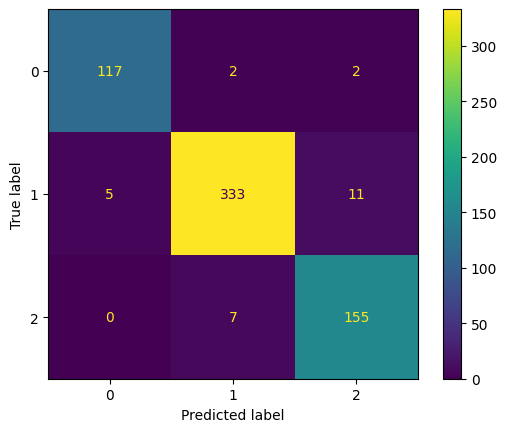

In [41]:
DCM = metrics.confusion_matrix(y_test,Dpred,labels = DModel.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = DCM,display_labels = DModel.classes_)
disp.plot()

 **class 0** : the model correctly predicted 117 instances. It misclassified 2 instances each as class 1 and class 2. This is a minor drop in precision but still indicates solid performance with limited confusion.

 **class 1** : the model correctly identified 333 out of the total class 1 samples. However, 4 were wrongly predicted as class 0 and 12 as class 2. While the majority are classified correctly, the increase in misclassifications into class 2 shows a bit more overlap between those two classes.

 **class 2** : 154 predictions were correct. The model mistakenly labeled 1 instance as class 0 and 7 as class 1. Despite these small errors, the model maintains a high accuracy on class 2 overall.



In [42]:
joblib.dump(xgb_model,'/content/drive/MyDrive/class.pkl')

['/content/drive/MyDrive/class.pkl']

# **TIME SERIES**

In [43]:
data2 = real_data.groupby(['Year', 'Season'])['price'].mean().reset_index()
data2.head()

,Year,Season,price
0,2004,Kharif,84061.908451
1,2004,Rabi,88186.943038
2,2004,Zaid,84180.993289
3,2005,Kharif,76434.103448
4,2005,Rabi,74705.246575


In [44]:
data2['Year']= pd.to_datetime(data2['Year'], format='%Y')

In [45]:
kharif = data2[data2['Season'] == 'Kharif']
Rabi = data2[data2['Season'] == 'Rabi']
zaid = data2[data2['Season'] == 'Zaid']

In [46]:
kharif = kharif.rename(columns={ "Year" : "ds", "price": "y"} )
Rabi = Rabi.rename(columns={ "Year" : "ds", "price": "y"} )
zaid = zaid.rename(columns={ "Year" : "ds", "price": "y"} )

In [47]:
from prophet import Prophet
kharif_model = Prophet()
kharif_model.fit(kharif)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgx0bo2m9/1p881vxd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgx0bo2m9/g8bqs7h2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54251', 'data', 'file=/tmp/tmpgx0bo2m9/1p881vxd.json', 'init=/tmp/tmpgx0bo2m9/g8bqs7h2.json', 'output', 'file=/tmp/tmpgx0bo2m9/prophet_model3tgcl31c/prophet_model-20250716115855.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:58:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:58:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:

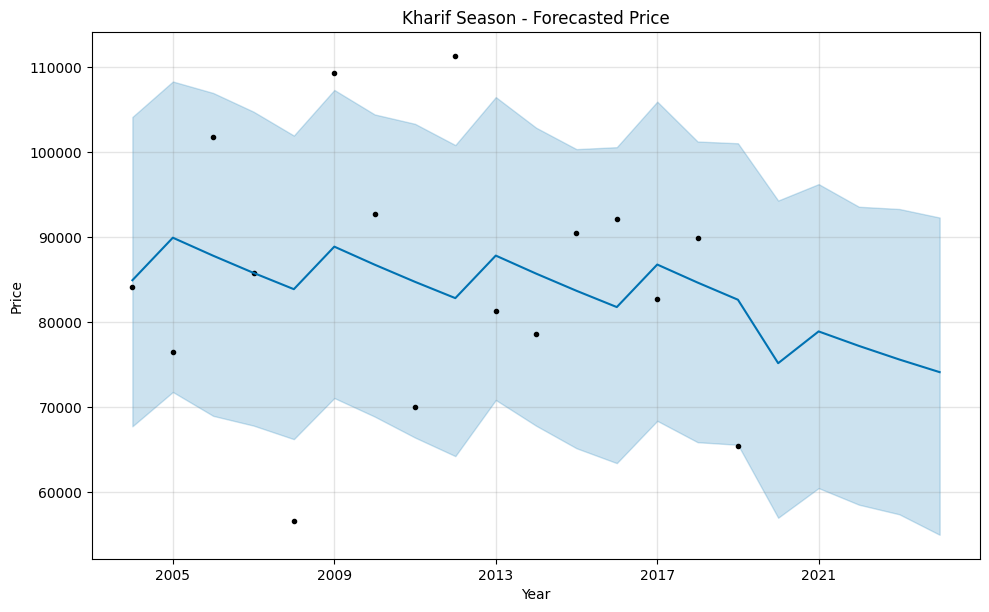

In [48]:
future_kharif = kharif_model.make_future_dataframe(periods = 5, freq = "Y")
forcast_kharif = kharif_model.predict(future_kharif)
kharif_model.plot(forcast_kharif)
plt.title("Kharif Season - Forecasted Price")
plt.xlabel("Year")
plt.ylabel("Price")
plt.grid(True)
plt.show()

In [49]:
Rabi_model = Prophet()
Rabi_model.fit(Rabi)

future_Rabi = Rabi_model.make_future_dataframe(periods=5, freq='Y')
forecast_Rabi = Rabi_model.predict(future_Rabi)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgx0bo2m9/xxwd3gds.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgx0bo2m9/t5wmxy7v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60630', 'data', 'file=/tmp/tmpgx0bo2m9/xxwd3gds.json', 'init=/tmp/tmpgx0bo2m9/t5wmxy7v.json', 'output', 'file=/tmp/tmpgx0bo2m9/prophet_modelpd7e5497/prophet_model-20250716115856.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:58:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:58:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:

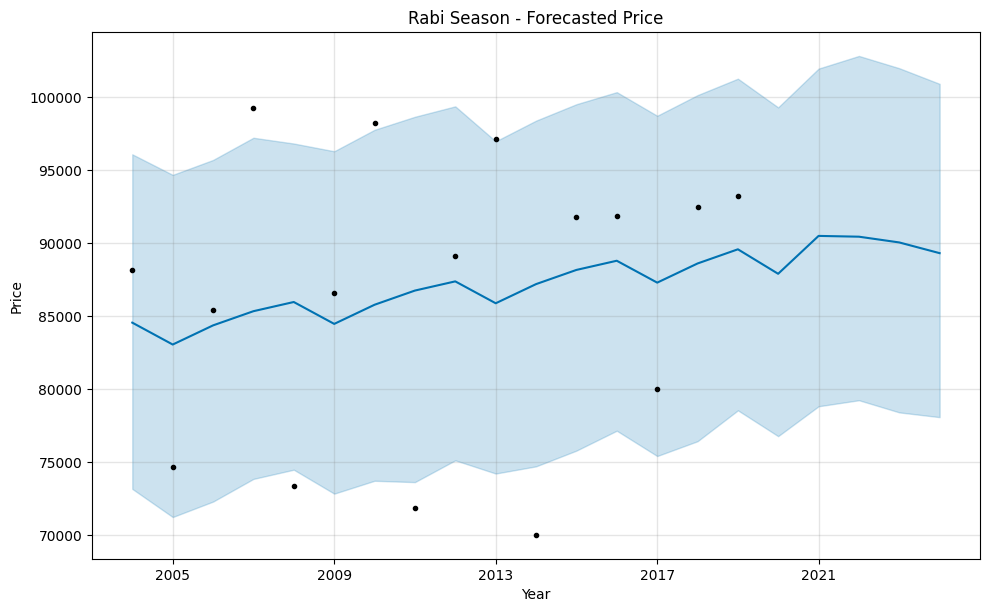

In [50]:
Rabi_model.plot(forecast_Rabi)
plt.title("Rabi Season - Forecasted Price")
plt.xlabel("Year")
plt.ylabel("Price")
plt.grid(True)
plt.show()

In [51]:
zaid_model = Prophet()
zaid_model.fit(zaid)

future_zaid = zaid_model.make_future_dataframe(periods=5, freq='Y')
forecast_zaid = zaid_model.predict(future_zaid)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgx0bo2m9/o44zhqvc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgx0bo2m9/0el5ya2e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98701', 'data', 'file=/tmp/tmpgx0bo2m9/o44zhqvc.json', 'init=/tmp/tmpgx0bo2m9/0el5ya2e.json', 'output', 'file=/tmp/tmpgx0bo2m9/prophet_model5tygfve1/prophet_model-20250716115856.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:58:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:58:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:

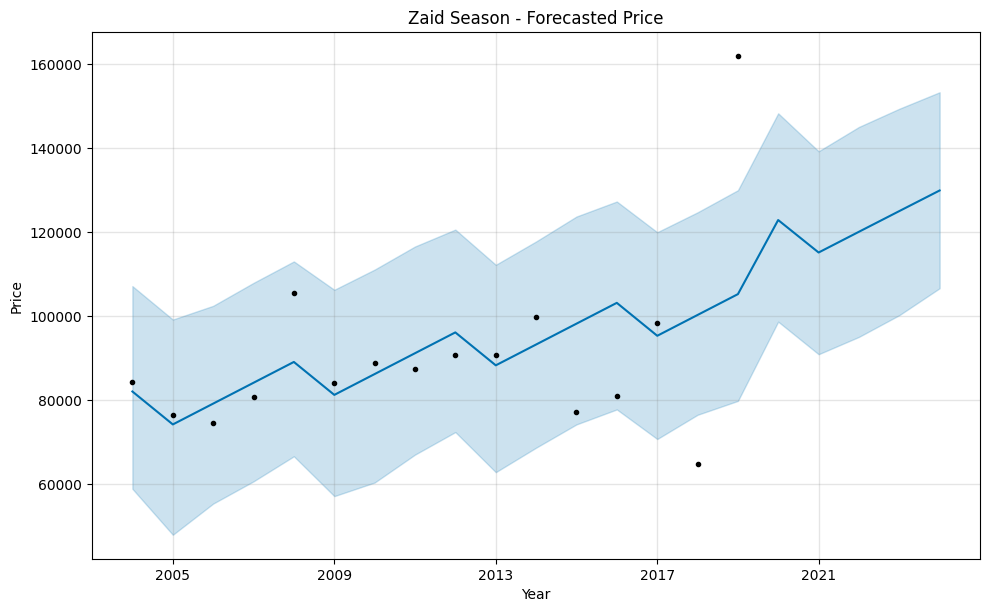

In [52]:
zaid_model.plot(forecast_zaid)
plt.title("Zaid Season - Forecasted Price")
plt.xlabel("Year")
plt.ylabel("Price")
plt.grid(True)
plt.show()